In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # 1
from sklearn.metrics import confusion_matrix,roc_curve,auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier # 2
from sklearn.linear_model import LogisticRegression# 3
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('fram')
df

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0,1,17520,48
3,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,0,0,22265,61
4,3,1,23.0,0.0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.000000,0,0,16790,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,2,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0,0,17520,48
4236,1,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0,0,16060,44
4237,2,0,0.0,0.0,0,0,0,263.0,133.5,83.0,21.47,80.0,107.000000,0,0,18980,52
4238,3,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0,1,14600,40


In [34]:
X  = df.drop(columns=['TenYearCHD'], axis=0)
y = df.TenYearCHD

In [35]:
X.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1,17520,48
3,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0,22265,61
4,3,1,23.0,0.0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790,46


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.25, random_state=47)

In [38]:
print("X_tr_shape", X_train.shape)
print("X_te_shape", X_test.shape)
print("y_tr_shape", y_train.shape)
print("y_te_shape", X_test.shape)

X_tr_shape (3180, 16)
X_te_shape (1060, 16)
y_tr_shape (3180,)
y_te_shape (1060, 16)


In [39]:
rfc = RandomForestClassifier()

In [40]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
rfc.score(X_test, y_test)

1.0

In [42]:
y_pred = rfc.predict(X_test)

In [43]:
print('array:',y_test[:25].to_list())
y_pred[:25]

array: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

<Axes: xlabel='TenYearCHD'>

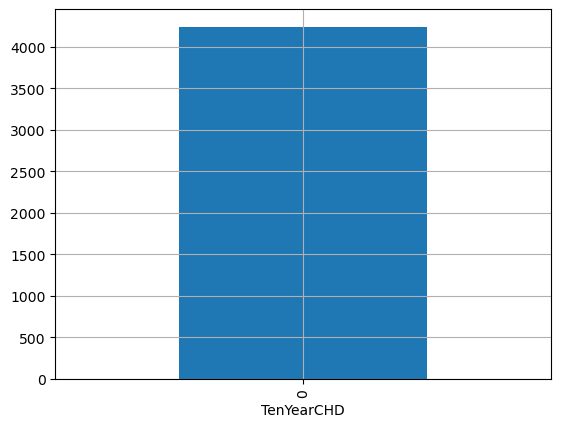

In [45]:
df.TenYearCHD.value_counts().plot(kind='bar', grid=True)

In [46]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.25, random_state=47)

In [47]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (3180, 16)
X_test shape:  (1060, 16)
y_train shape:  (3180,)
y_test shape:  (1060,)


In [48]:
mlp = MLPClassifier()

In [49]:
mlp.fit(X_train,y_train)

MLPClassifier()

In [50]:
y_pred = mlp.predict(X_test)

In [51]:
mlp.score(X_train,y_train)

1.0

In [52]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [53]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.25, random_state=52)

In [54]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (3180, 16)
X_test shape:  (1060, 16)
y_train shape:  (3180,)
y_test shape:  (1060,)


In [55]:
lre = LogisticRegression ()

In [56]:
lre.fit(X_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [57]:
y_pred = lre.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [58]:
lre.score(X_train,y_train)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [59]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0